<a href="https://colab.research.google.com/github/haddybhaiya/unsupervised-learning-classes/blob/main/pca_demo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

using kaggle legacy API key for data import

In [1]:
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


open kaggle hub and select CODE to get this

In [42]:
digit_recognizer = kagglehub.competition_download('digit-recognizer')
print("pikachu")

pikachu


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
df = pd.read_csv(os.path.join(digit_recognizer,'train.csv'))

In [44]:
# !unzip digit-recognizer.zip

In [45]:
# import pandas as pd
# df = pd.read_csv('/content/train.csv')

In [46]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
33891,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df.shape

(42000, 785)

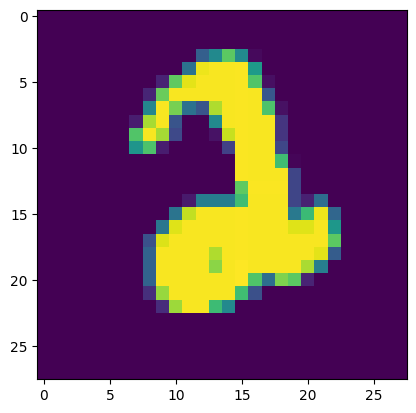

In [49]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[8527,1:].values.reshape(28,28))

In [50]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [52]:
X_train.shape

(33600, 784)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [54]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time()-start)


19.46517038345337


In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [57]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components = 200)

In [59]:
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [60]:
X_train_trf.shape

(33600, 200)

In [61]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [62]:
y_pred = knn.predict(X_test_trf)

In [63]:
accuracy_score(y_test,y_pred)

0.9507142857142857

In [64]:
#  accuracy_score(y_test,y_pred)

In [65]:

# for i in range(1,785):
#   pca = PCA(n_components =i)
#   X_train_trf = pca.fit_transform(X_train_scaled)
#   X_test_trf = pca.transform(X_test_scaled)
#   knn.fit(X_train_trf,y_train)
#   y_pred = knn.predict(X_test_trf)
#   maxi = 0
#   for i in range(1,10):
#     if accuracy_score(y_test,y_pred)>maxi:
#       maxi = accuracy_score(y_test,y_pred)
#       print(maxi)
#       print(i)




In [66]:
# transforming to a 2D coordinate syste,
pca = PCA(n_components = 2)
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)


In [67]:
X_train_trf

array([[-2.71863253, -0.48982409],
       [-0.67698015, -6.75362491],
       [-3.03323281,  6.50981624],
       ...,
       [ 2.14883643,  0.78079444],
       [ 1.05957006,  0.94767312],
       [17.70258446,  1.96188185]])

will show 3d widget

In [69]:
# import plotly.express as px
# y_train_trf = y_train.astype(str)
# fig = px.scatter(x=X_train_trf[:,0],y=X_train_trf[:,1],color=y_train_trf,color_discrete_sequence=px.colors.qualitative.G10)
# fig.show()



In [70]:
# transforming in 3d
pca  = PCA(n_components = 3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [71]:
X_train_trf

array([[-226.60523462, -305.89437099, -417.17563833],
       [  38.33583717,  461.09152047, -100.40840682],
       [-305.49225463,  351.67141678,  961.3475787 ],
       ...,
       [ -28.00133402, -596.06287179, -606.25130926],
       [ 233.97011308,  -18.64779077,  148.27481803],
       [1096.50373629,  254.72333173,  560.33354832]])

will show 3d widget interactive for each number

In [82]:
# import plotly.express as px
# y_train_trf = y_train.astype(str)
# fig = px.scatter_3d(df, x = X_train_trf[:,0], y =X_train_trf[:,1], z = X_train_trf[:,2],
#                     color = y_train_trf)
# fig.update_layout(
#     margin = dict(l=28,r=20,b=20,t=20),
#     paper_bgcolor = 'LightSteelBlue',
#     plot_bgcolor = 'rgb(0,0,0)'
# )
# fig.show()


In [83]:
pca.explained_variance_
# eigen_values

array([3.35506576e+05, 2.44807105e+05, 2.12051035e+05, 1.85066153e+05,
       1.68000246e+05, 1.48918349e+05, 1.12510833e+05, 9.93294844e+04,
       9.51402644e+04, 7.99789771e+04, 7.18729893e+04, 7.02954186e+04,
       5.86421706e+04, 5.77978479e+04, 5.44160811e+04, 5.10942763e+04,
       4.54324809e+04, 4.40877557e+04, 4.06349678e+04, 3.95293850e+04,
       3.69465718e+04, 3.51694514e+04, 3.31919492e+04, 3.14980784e+04,
       3.03792806e+04, 2.86216441e+04, 2.79878549e+04, 2.66233147e+04,
       2.54782977e+04, 2.38073682e+04, 2.26921743e+04, 2.17431167e+04,
       2.07130988e+04, 2.02157853e+04, 1.92920932e+04, 1.85377184e+04,
       1.74405813e+04, 1.67269421e+04, 1.61818599e+04, 1.59519157e+04,
       1.55375765e+04, 1.52480605e+04, 1.43023838e+04, 1.35853438e+04,
       1.31721648e+04, 1.28124366e+04, 1.23858612e+04, 1.19793099e+04,
       1.14757321e+04, 1.09198370e+04, 1.07891523e+04, 1.05497976e+04,
       1.00392867e+04, 9.83967219e+03, 9.58435154e+03, 9.24819162e+03,
      

In [84]:
pca.components_.shape
# eigen_vectors


(784, 784)

In [85]:
pca.explained_variance_ratio_

array([9.77072202e-02, 7.12934512e-02, 6.17541312e-02, 5.38955140e-02,
       4.89255299e-02, 4.33684433e-02, 3.27657386e-02, 2.89270270e-02,
       2.77070300e-02, 2.32917149e-02, 2.09310651e-02, 2.04716403e-02,
       1.70779469e-02, 1.68320607e-02, 1.58472125e-02, 1.48798267e-02,
       1.32309818e-02, 1.28393670e-02, 1.18338358e-02, 1.15118647e-02,
       1.07596902e-02, 1.02421519e-02, 9.66625789e-03, 9.17296381e-03,
       8.84714420e-03, 8.33528008e-03, 8.15070612e-03, 7.75332066e-03,
       7.41986542e-03, 6.93325236e-03, 6.60848230e-03, 6.33209492e-03,
       6.03213006e-03, 5.88730096e-03, 5.61830060e-03, 5.39860932e-03,
       5.07909781e-03, 4.87126968e-03, 4.71252924e-03, 4.64556419e-03,
       4.52489910e-03, 4.44058540e-03, 4.16518263e-03, 3.95636411e-03,
       3.83603691e-03, 3.73127577e-03, 3.60704723e-03, 3.48865016e-03,
       3.34199674e-03, 3.18010732e-03, 3.14204894e-03, 3.07234334e-03,
       2.92367086e-03, 2.86553852e-03, 2.79118328e-03, 2.69328579e-03,
      

In [86]:
pca = PCA(n_components =None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)
# so actually mr tablib shows = instead of ==

In [87]:
pca.explained_variance_.shape

(784,)

In [88]:


pca.components_.shape

(784, 784)

In [89]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09770722, 0.16900067, 0.2307548 , 0.28465032, 0.33357585,
       0.37694429, 0.40971003, 0.43863706, 0.46634409, 0.4896358 ,
       0.51056687, 0.53103851, 0.54811645, 0.56494851, 0.58079573,
       0.59567555, 0.60890653, 0.6217459 , 0.63357974, 0.6450916 ,
       0.65585129, 0.66609344, 0.6757597 , 0.68493267, 0.69377981,
       0.70211509, 0.7102658 , 0.71801912, 0.72543898, 0.73237223,
       0.73898072, 0.74531281, 0.75134494, 0.75723224, 0.76285054,
       0.76824915, 0.77332825, 0.77819952, 0.78291205, 0.78755761,
       0.79208251, 0.7965231 , 0.80068828, 0.80464464, 0.80848068,
       0.81221196, 0.815819  , 0.81930765, 0.82264965, 0.82582976,
       0.82897181, 0.83204415, 0.83496782, 0.83783336, 0.84062454,
       0.84331783, 0.84596712, 0.84853351, 0.85106204, 0.85351457,
       0.85592008, 0.85831105, 0.86057999, 0.86279635, 0.8649424 ,
       0.86700054, 0.86901774, 0.87098082, 0.87291702, 0.87479944,
       0.87665559, 0.87847316, 0.88022525, 0.88195105, 0.88360

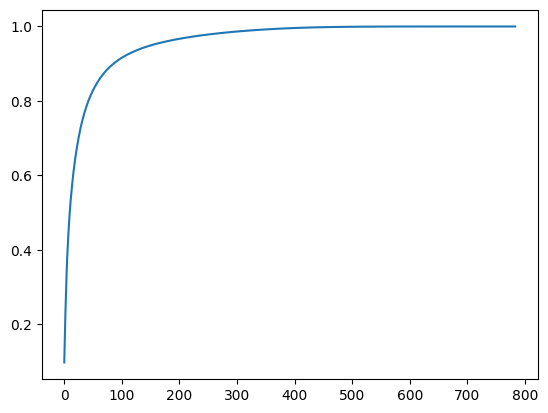

In [90]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [91]:
#iterate through 200-300 for accuracy score for each pca(columns like 201,202,203,204....)